In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target
label. 

In [73]:
df = pd.read_csv("insurance.csv")

In [74]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.mode

<bound method DataFrame.mode of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [10]:
df.shape

(1338, 7)

In [11]:
df.size

9366

2. Explore the data using at least 3 data exploratory tools of your choosing in pandas and
interpret your observation in a markdown cell of what form of predictive analysis that can
be conducted on the data. 

In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
df['bmi'].value_counts()

32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
df1=df.groupby(['sex','smoker']).count()
df1

age  bmi  children  region  charges
sex    smoker                                     
female no      547  547       547     547      547
       yes     115  115       115     115      115
male   no      517  517       517     517      517
       yes     159  159       159     159      159

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

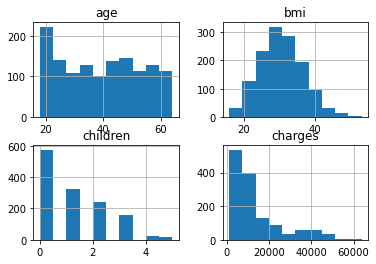

In [18]:
df.hist()

<AxesSubplot:>

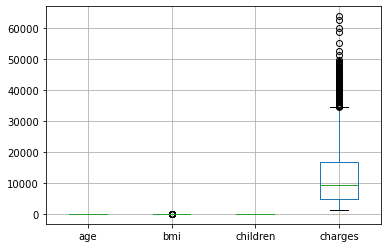

In [19]:
df.boxplot()

<AxesSubplot:xlabel='age', ylabel='charges'>

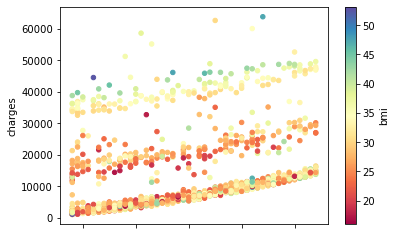

In [20]:
df.plot.scatter(x='age',y='charges',c='bmi',colormap='Spectral')

<AxesSubplot:xlabel='age', ylabel='charges'>

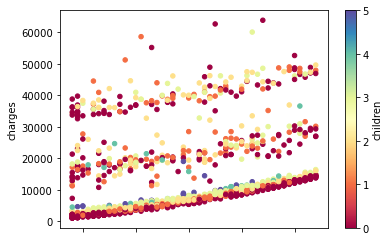

In [21]:
df.plot.scatter(x='age',y='charges',c='children',colormap='Spectral')

In [23]:
#Correlation
df_corr = df.corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [24]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
#check for any missing or null values
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

<AxesSubplot:>

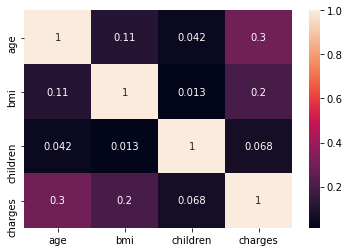

In [27]:
sns.heatmap(df_corr,annot=True)

In [253]:
#correlation to the target column : charges
cor_target = abs(df_corr["charges"])
cor_target 

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

age and bmi are the more correlated to the charges

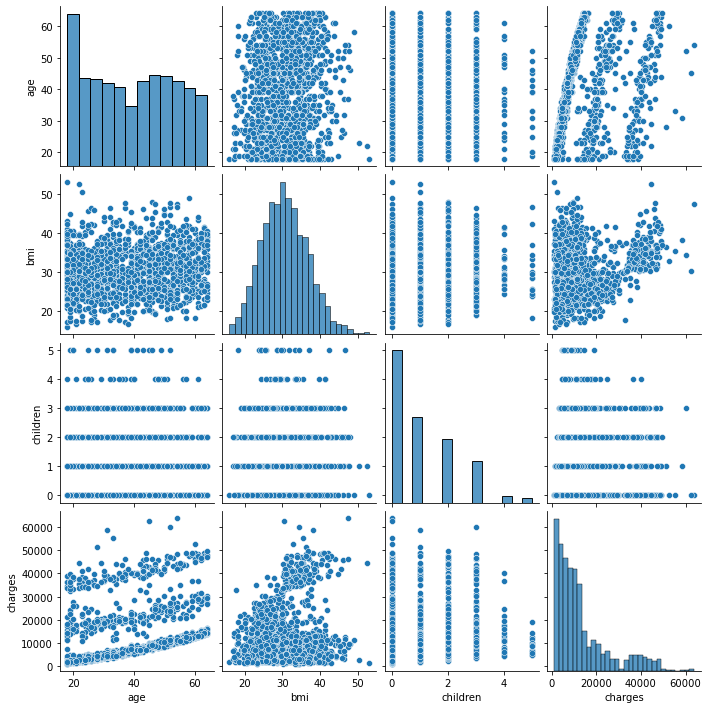

In [28]:
sns.pairplot(df)

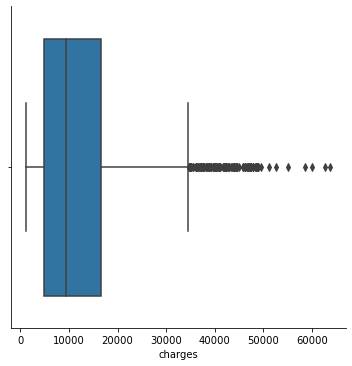

In [29]:
sns.catplot(x='charges',kind='box',data=df)

In [96]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [30]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
#Numerical - Numerical Variables : age,bmi and charges


<AxesSubplot:xlabel='sex', ylabel='count'>

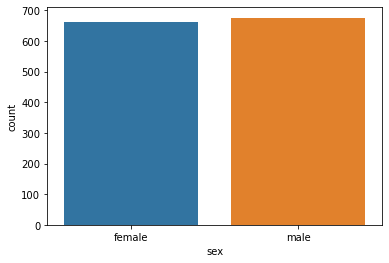

In [31]:
#Catergorical variables: sex, smoker,region and children
sns.countplot(x = 'sex', data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

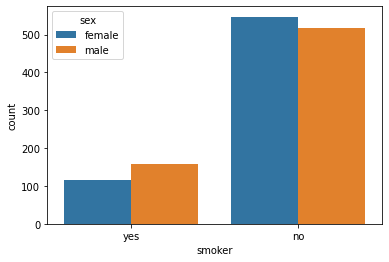

In [105]:
sns.countplot(x='smoker',hue='sex',data = df)

3. Visualize the age distribution for the column ‘age’ and comment on the results in a
markdown cell as well. (Ensure your visualization is of an appropriate size for effective
analysis)

<AxesSubplot:>

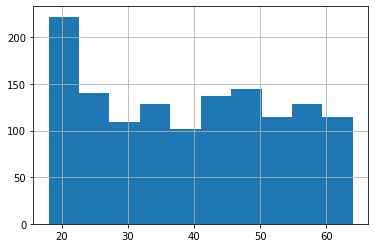

In [32]:
df['age'].hist(bins=10)

4. Isolate all the continuous and discrete columns into their respective lists named
‘numerical_continuous’ and ‘numerical_discrete’ respectively. 

In [33]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [209]:
numerical_columns = [var for var in df.columns if df[var].dtype!='O']
numerical_columns

['age', 'bmi', 'children', 'charges']

In [211]:
discrete_variables = []

for var in numerical_columns:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete_variables.append(var)
print()
print('There are {} discrete variables'.format(len(discrete_variables)))

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


In [86]:
numerical_discrete=df.drop(columns=['age','sex','bmi','smoker','region','charges'])
column_name = numerical_discrete.columns.tolist()
numerical_discrete_list = numerical_discrete.values.tolist()
numerical_discrete_list.insert(0,column_name)
numerical_discrete_list

[['children'],
 [0],
 [1],
 [3],
 [0],
 [0],
 [0],
 [1],
 [3],
 [2],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [2],
 [3],
 [0],
 [2],
 [1],
 [2],
 [0],
 [0],
 [5],
 [0],
 [1],
 [0],
 [3],
 [0],
 [1],
 [0],
 [0],
 [2],
 [1],
 [2],
 [1],
 [0],
 [2],
 [0],
 [0],
 [1],
 [0],
 [2],
 [1],
 [0],
 [3],
 [2],
 [2],
 [2],
 [1],
 [2],
 [3],
 [4],
 [1],
 [1],
 [0],
 [0],
 [2],
 [1],
 [0],
 [3],
 [0],
 [5],
 [3],
 [1],
 [2],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [4],
 [2],
 [2],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [3],
 [2],
 [2],
 [1],
 [3],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [3],
 [1],
 [1],
 [1],
 [2],
 [0],
 [0],
 [1],
 [2],
 [0],
 [0],
 [3],
 [0],
 [0],
 [1],
 [0],
 [2],
 [2],
 [0],
 [0],
 [1],
 [3],
 [0],
 [0],
 [0],
 [2],
 [2],
 [0],
 [0],
 [2],
 [0],
 [0],
 [0],
 [0],
 [0],
 [3],
 [0],
 [2],
 [1],
 [2],
 [2],
 [3],
 [3],
 [3],
 [1],
 [1],
 [1],
 [1],
 [0],
 [3],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [3],
 [0],
 [0],
 [1],
 [2],
 

In [213]:
#skip charges column which is the target label
numerical_continuos_variables = [var for var in numerical_columns if var not in discrete_variables and var not in ['charges']]
print('There are {} numerical and continuous variables'.format(len(numerical_continuos_variables)))

There are 2 numerical and continuous variables


In [214]:
numerical_continuos_variables

['age', 'bmi']

In [215]:
#drop all columns which are not numerical_continuous
numerical_continuous = df.drop(columns=['sex','children','smoker','region','charges'])

#get column names of numerical_continuous columns and convert to a list
headers = numerical_continuous.columns.tolist()

#convert numerical_continuous dataframe to a list
numerical_continuous_list = numerical_continuous.values.tolist()

#add column names to the list
numerical_continuous_list.insert(0,headers)
numerical_continuous_list

[['age', 'bmi'],
 [19.0, 27.9],
 [18.0, 33.77],
 [28.0, 33.0],
 [33.0, 22.705],
 [32.0, 28.88],
 [31.0, 25.74],
 [46.0, 33.44],
 [37.0, 27.74],
 [37.0, 29.83],
 [60.0, 25.84],
 [25.0, 26.22],
 [62.0, 26.29],
 [23.0, 34.4],
 [56.0, 39.82],
 [27.0, 42.13],
 [19.0, 24.6],
 [52.0, 30.78],
 [23.0, 23.845],
 [56.0, 40.3],
 [30.0, 35.3],
 [60.0, 36.005],
 [30.0, 32.4],
 [18.0, 34.1],
 [34.0, 31.92],
 [37.0, 28.025],
 [59.0, 27.72],
 [63.0, 23.085],
 [55.0, 32.775],
 [23.0, 17.385],
 [31.0, 36.3],
 [22.0, 35.6],
 [18.0, 26.315],
 [19.0, 28.6],
 [63.0, 28.31],
 [28.0, 36.4],
 [19.0, 20.425],
 [62.0, 32.965],
 [26.0, 20.8],
 [35.0, 36.67],
 [60.0, 39.9],
 [24.0, 26.6],
 [31.0, 36.63],
 [41.0, 21.78],
 [37.0, 30.8],
 [38.0, 37.05],
 [55.0, 37.3],
 [18.0, 38.665],
 [28.0, 34.77],
 [60.0, 24.53],
 [36.0, 35.2],
 [18.0, 35.625],
 [21.0, 33.63],
 [48.0, 28.0],
 [36.0, 34.43],
 [40.0, 28.69],
 [58.0, 36.955],
 [58.0, 31.825],
 [18.0, 31.68],
 [53.0, 22.88],
 [34.0, 37.335],
 [43.0, 27.36],
 [25.0, 33.

5. Visually identify if there is presence of any outliers in the numerical_continuous columns
and resolve them using a zscore test and a threshold of your choosing. 

<AxesSubplot:>

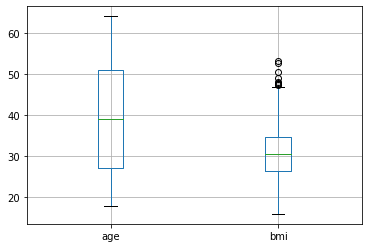

In [216]:
numerical_continuous.boxplot()

<AxesSubplot:ylabel='Density'>

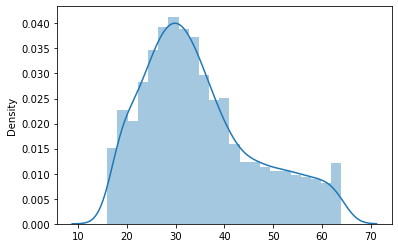

In [251]:
sns.distplot(numerical_continuous)

<AxesSubplot:>

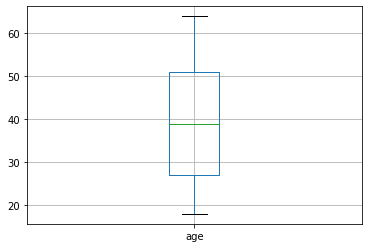

In [217]:
numerical_continuous.boxplot(column = 'age')

<AxesSubplot:>

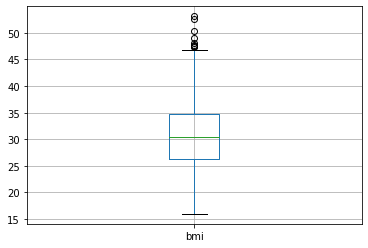

In [218]:
numerical_continuous.boxplot(column = 'bmi')

There are outliers for bmi column

In [219]:
from scipy import stats
zscore = np.abs(stats.zscore(numerical_continuous))
print(zscore)

[[1.43876426 0.45332   ]
 [1.50996545 0.5096211 ]
 [0.79795355 0.38330685]
 ...
 [1.50996545 1.0148781 ]
 [1.29636188 0.79781341]
 [1.55168573 0.26138796]]


In [226]:
threshold = 2
print(np.where(zscore > threshold))

(array([  28,  116,  128,  172,  198,  232,  250,  286,  292,  356,  380,
        383,  401,  410,  412,  428,  438,  442,  454,  493,  521,  543,
        547,  549,  563,  572,  582,  660,  674,  680,  701,  796,  811,
        821,  847,  860,  867,  895,  930,  941,  950,  951, 1024, 1029,
       1047, 1074, 1085, 1088, 1131, 1133, 1156, 1205, 1226, 1286, 1312,
       1317, 1332], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [233]:
numerical_continuous_clean = numerical_continuous
numerical_continuous_clean = numerical_continuous_clean[(zscore < threshold).all(axis=1)]

In [234]:
df.shape


(1338, 7)

In [235]:
numerical_continuous_clean.shape

(1281, 2)

6. Validate that your analysis above was successful by visualizing the value distribution in
the resulting columns using an appropriate visualization method. 

<AxesSubplot:>

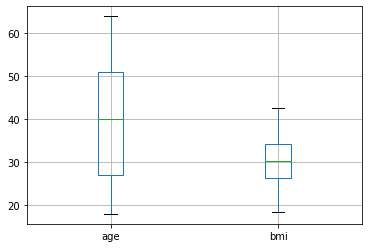

In [236]:
numerical_continuous_clean.boxplot()

<AxesSubplot:ylabel='Density'>

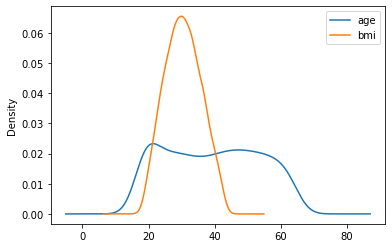

In [238]:
numerical_continuous_clean.plot.kde()

7. Isolate all the categorical column names into a list named ‘categorical’. 

In [205]:
categorical_columns = [var for var in df.columns if df[var].dtype=='O']
categorical_columns

['sex', 'smoker', 'region']

In [206]:
categorical=df.drop(columns=['age','bmi','children','charges'])
column_name_cat = categorical.columns.tolist()
categorical_list = categorical.values.tolist()
categorical_list.insert(0,column_name_cat)
categorical_list

[['sex', 'smoker', 'region'],
 ['female', 'yes', 'southwest'],
 ['male', 'no', 'southeast'],
 ['male', 'no', 'southeast'],
 ['male', 'no', 'northwest'],
 ['male', 'no', 'northwest'],
 ['female', 'no', 'southeast'],
 ['female', 'no', 'southeast'],
 ['female', 'no', 'northwest'],
 ['male', 'no', 'northeast'],
 ['female', 'no', 'northwest'],
 ['male', 'no', 'northeast'],
 ['female', 'yes', 'southeast'],
 ['male', 'no', 'southwest'],
 ['female', 'no', 'southeast'],
 ['male', 'yes', 'southeast'],
 ['male', 'no', 'southwest'],
 ['female', 'no', 'northeast'],
 ['male', 'no', 'northeast'],
 ['male', 'no', 'southwest'],
 ['male', 'yes', 'southwest'],
 ['female', 'no', 'northeast'],
 ['female', 'no', 'southwest'],
 ['male', 'no', 'southeast'],
 ['female', 'yes', 'northeast'],
 ['male', 'no', 'northwest'],
 ['female', 'no', 'southeast'],
 ['female', 'no', 'northeast'],
 ['female', 'no', 'northwest'],
 ['male', 'no', 'northwest'],
 ['male', 'yes', 'southwest'],
 ['male', 'yes', 'southwest'],
 ['fe

8. Visually identify the outliers in the discrete and categorical features and resolve them using
the combined rare levels method.

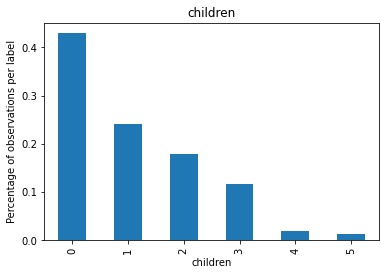

In [241]:
#outliers in discrete
for var in discrete_variables:
    (numerical_discrete.groupby(var)[var].count() / np.float(len(numerical_discrete))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

In [207]:
categorical.describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


9. Encode the discrete and categorical features with one of the measures of central tendency
of your choosing.

In [242]:
categorical.mode()

,sex,smoker,region
0,male,no,southeast


In [245]:
numerical_discrete.mode()

,children
0,0


10. Separate your features from the target appropriately. Narrow down the number of features
to 5 using the most appropriate and accurate method. Which feature had to be dropped and
what inference would you give as the main contributor of dropping the given feature.

In [246]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


10. Separate your features from the target appropriately. Narrow down the number of features
to 5 using the most appropriate and accurate method. Which feature had to be dropped and
what inference would you give as the main contributor of dropping the given feature.

In [250]:
#features
X = df.iloc[:,:-1].values

#target
Y = df.iloc[:,6].values

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)